In [3]:

import numpy as np 
import matplotlib.pyplot as plt


import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter  
from IPython.display import HTML
from pprint import pprint
import pandas as pd
from io import StringIO

from mpltools import annotation

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm



In [22]:
def id_to_index(id, rows, columns):
    id_column = id % columns
    id_row = id / columns
    return id_column, id_row

def find_dimensions(p):
    min_gap = p
    top = int(np.sqrt(p) + 1)
    for i in range(1,top+1):
        if (p % i == 0):
            gap = abs((p / i) - i)

            if (gap < min_gap):
                min_gap = gap
                rows = i
                columns = int(p / i)
    return rows, columns


In [231]:
p=4

out=750
print(rows,columns)
        
        

2 2


In [255]:
def stitch_together_frame(p,out):
    data =pd.DataFrame()
    rows, columns = find_dimensions(p)
    for i in range(p):
            for row in range(rows):
                    if (row == 0):
                         for col in range(columns):
                            if(col == 0):
                                new_data_0 = np.loadtxt('out_parallel/output process_' + str(0) + '_' + str(j) + '.dat', unpack=True)
                                df=pd.DataFrame(new_data_0)

                            if(col>0):
                                new_data = np.loadtxt('out_parallel/output process_' + str(1) + '_' + str(j) + '.dat', unpack=True)
                                df2=pd.DataFrame(new_data)

                                df=pd.concat([df,df2],axis=1)

                    if (row >0):
                        for col in range(columns):
                            if(col == 0):
                                new_data_1 = np.loadtxt('out_parallel/output process_' + str(2) + '_' + str(j) + '.dat', unpack=True)
                                df_temp=pd.DataFrame(new_data_1)

                            if(col>0):
                                new_data = np.loadtxt('out_parallel/output process_' + str(3) + '_' + str(j) + '.dat', unpack=True)
                                df_temp_2=pd.DataFrame(new_data)

                                df_temp=pd.concat([df_temp,df_temp_2],axis=1)


                        df=df.append(df_temp)
#             data=data.append(df)
    return df
                        
# print(df.shape)

In [256]:
out = 5

print(stitch_together_frame(4,out))

          0         1         2         3         4         5         6    \
0   -0.466246 -0.449967 -0.417109 -0.369157 -0.304463 -0.226245 -0.139842   
1   -1.015700 -1.003520 -0.978682 -0.934525 -0.868073 -0.777759 -0.674434   
2   -1.561500 -1.552850 -1.529920 -1.487470 -1.419110 -1.320450 -1.201900   
3   -2.086710 -2.081430 -2.057470 -2.014950 -1.944780 -1.843890 -1.716340   
4   -2.579790 -2.578870 -2.553010 -2.506760 -2.434330 -2.334490 -2.204560   
..        ...       ...       ...       ...       ...       ...       ...   
195  2.250030  2.206750  2.142250  2.061150  1.968990  1.861520  1.731730   
196  1.764590  1.749000  1.717450  1.665190  1.600710  1.520530  1.418980   
197  1.211860  1.254590  1.268360  1.249880  1.212730  1.158110  1.083880   
198  0.549873  0.745186  0.812485  0.823781  0.811845  0.783155  0.734172   
199  0.224178  0.342423  0.391295  0.406052  0.405644  0.395155  0.370598   

          7         8         9    ...       190       191       192  \
0  

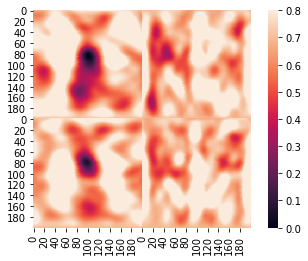

In [258]:
# output=stitch_together_frame(4,out)
import seaborn as sns
p=4
it=750
# ax = plt.subplot()
# sns.heatmap(output, annot=True)
imax=400
jmax=400
fig = plt.figure()
def init():
    sns.heatmap(np.zeros((imax, jmax)), vmax=.8, square=True)

def animate(i):
    data = data_list[i]
    sns.heatmap(data, vmax=.8, square=True, cbar=False)

data_list = []
for j in range(0,it,15):
    data = stitch_together_frame(p,it)
    data_list.append(data)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat = False)

savefile = r"wave_iterations.gif"
pillowwriter = animation.PillowWriter(fps=20)
anim.save(savefile, writer=pillowwriter)

plt.show()

In [242]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib import animation

# def init():
#     sns.heatmap(output, anot=True)

# def animate(i):
#     data = np.random.rand(dimension[0], dimension[1])
#     sns.heatmap(data, vmax=.8, cbar=False)

# anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat=False)

# plt.show()